In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
pd.options.display.max_colwidth = 300
pd.set_option('display.max_columns', 1000)


In [4]:
carData = pd.read_table(r"C:\Users\owen.sanders\Downloads\RecallAnalysis-master\FLAT_CMPL\FLAT_CMPL.txt", error_bad_lines = False,  encoding = 'ISO-8859-1')



b'Skipping line 562494: expected 49 fields, saw 70\n'
b'Skipping line 1032227: expected 49 fields, saw 50\n'
b'Skipping line 1208327: expected 49 fields, saw 50\n'
b'Skipping line 1293122: expected 49 fields, saw 50\n'
b'Skipping line 1297995: expected 49 fields, saw 50\nSkipping line 1297996: expected 49 fields, saw 50\nSkipping line 1297997: expected 49 fields, saw 50\n'
b'Skipping line 1317866: expected 49 fields, saw 50\nSkipping line 1322778: expected 49 fields, saw 50\nSkipping line 1324686: expected 49 fields, saw 50\n'
b'Skipping line 1331382: expected 49 fields, saw 50\nSkipping line 1334709: expected 49 fields, saw 50\n'
C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (30,32,33,34,35,36,38,39,40,41,42,43,44,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
carData.columns = ['cmplid', 'odino', 'mfr_name', 'maketxt', 'modeltxt','yeartxt', 'crash','faildate','fire','injured','deaths','compdesc','city', 'state', 'vin','datea', 'ldate', 'miles', 'occurences', 'cdescr', 'cmpl_type', 'police_rpt_yn', 'purch_dt', 'orig_owner_yn', 'anti_breaks_yn', 'cruise_cont_yn', 'num_cyls', 'drive_train', 'fuel_sys', 'fuel_type', 'trans_type', 'veh_speed', 'dot', 'tire_size', 'loc_of_tire', 'tire_fail_type','orig_equip_yn', 'manuf_dt', 'seat_type', 'restraint_type', 'dealer_name', 'dealer_tel', 'dealer_city', 'dealer_state', 'dealer_zip', 'prod_type', 'repaired_yn', 'medical_attn', 'veichles_towed_yn'] 

In [11]:
analyzer = SentimentIntensityAnalyzer()


In [12]:
carData.keys()



Index(['cmplid', 'odino', 'mfr_name', 'maketxt', 'modeltxt', 'yeartxt',
       'crash', 'faildate', 'fire', 'injured', 'deaths', 'compdesc', 'city',
       'state', 'vin', 'datea', 'ldate', 'miles', 'occurences', 'cdescr',
       'cmpl_type', 'police_rpt_yn', 'purch_dt', 'orig_owner_yn',
       'anti_breaks_yn', 'cruise_cont_yn', 'num_cyls', 'drive_train',
       'fuel_sys', 'fuel_type', 'trans_type', 'veh_speed', 'dot', 'tire_size',
       'loc_of_tire', 'tire_fail_type', 'orig_equip_yn', 'manuf_dt',
       'seat_type', 'restraint_type', 'dealer_name', 'dealer_tel',
       'dealer_city', 'dealer_state', 'dealer_zip', 'prod_type', 'repaired_yn',
       'medical_attn', 'veichles_towed_yn'],
      dtype='object')

In [13]:
carData.describe()


C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,cmplid,odino,yeartxt,faildate,injured,deaths,datea,ldate,miles,occurences,purch_dt,num_cyls,veh_speed,manuf_dt
count,1.365544e+06,1.365538e+06,1.365351e+06,1.254501e+06,651153.000000,634600.000000,1.365544e+06,1.365544e+06,7.385250e+05,926937.000000,3.662200e+05,404998.000000,674009.000000,5.033000e+03
mean,6.829165e+05,7.821254e+06,2.357733e+03,2.006880e+07,0.142177,0.009861,2.007341e+07,2.007314e+07,6.821522e+04,11.115270,2.001297e+07,5.883360,28.015602,2.006687e+07
std,3.943057e+05,5.585075e+06,1.648137e+03,1.490403e+05,0.800922,0.440351,6.424980e+04,6.462886e+04,1.118247e+05,256.507384,2.554607e+05,1.620019,27.710059,2.586039e+05
min,2.000000e+00,0.000000e+00,1.949000e+03,3.102000e+04,0.000000,0.000000,1.995010e+07,1.984022e+07,-9.500000e+04,-2.000000,1.072200e+04,0.000000,-70.000000,2.000403e+06
25%,3.413878e+05,NaN,NaN,NaN,NaN,NaN,2.002021e+07,2.002011e+07,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.829525e+05,NaN,NaN,NaN,NaN,NaN,2.008071e+07,2.008071e+07,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.024363e+06,NaN,NaN,NaN,NaN,NaN,2.013112e+07,2.013112e+07,NaN,NaN,NaN,NaN,NaN,NaN
max,1.366058e+06,1.000000e+09,9.999000e+03,2.203073e+07,99.000000,99.000000,2.017033e+07,2.017033e+07,9.999999e+06,9999.000000,9.898101e+07,99.000000,999.000000,2.016111e+07


In [5]:
test = analyzer.polarity_scores("")
print(test)


NameError: name 'analyzer' is not defined

In [14]:
#Collecting all of the numeric data into a lovely franken frame. Strings are also taken. This allows us to mine sentiment. 
# all possible columns = 'cmplid', 'odino', 'mfr_name', 'maketxt', 'modeltxt','yeartxt', 'crash','faildate','fire','injured','deaths','compdesc','city', 'state', 'vin','datea', 'ldate', 'miles', 'occurences', 'cdescr', 'cmpl_type', 'police_rpt_yn', 'purch_dt', 'orig_owner_yn', 'anti_breaks_yn', 'cruise_cont_yn', 'num_cyls', 'drive_train', 'fuel_sys', 'fuel_type', 'trans_type', 'veh_speed', 'dot', 'tire_size', 'loc_of_tire', 'tire_fail_type','orig_equip_yn', 'manuf_dt', 'seat_type', 'restraint_type', 'dealer_name', 'dealer_tel', 'dealer_city', 'dealer_state', 'dealer_zip', 'prod_type', 'repaired_yn', 'medical_attn', 'veichles_towed_yn'
frankenFrame = pd.DataFrame(columns = ['string', 'manufacturer', 'make', 'model', 'antilock', 'fire', 'injured', 'death','crash', 'miles', 'police_rpt_yn', 'cruise_cont_yn', 'fuel_sys', 'trans_type', 'veh_speed', 'tire_size', 'orig_equip_yn', 'seat_type', 'restraint_type', 'repaired_yn', 'medical_attn', 'veichles_towed_yn', 'compound',])
#frankenFrame['ComplaintNum'] = carData['1'] # No longer kept track of in order to drop duplicates. 
frankenFrame['string'] = carData['cdescr']
frankenFrame['manufacturer'] = carData['mfr_name']
frankenFrame['make'] = carData['maketxt']
frankenFrame['model'] = carData['modeltxt']
frankenFrame['antilock'] = carData['anti_breaks_yn']
frankenFrame['fire'] = carData['fire']
frankenFrame['injured'] = carData['injured']
frankenFrame['crash'] = carData['crash']
frankenFrame['miles'] = carData['miles']
frankenFrame['police_rpt_yn'] = carData['police_rpt_yn']
frankenFrame['cruise_cont_yn'] = carData['cruise_cont_yn']
frankenFrame['fuel_sys'] = carData['fuel_sys']
frankenFrame['trans_type'] = carData['trans_type']
frankenFrame['veh_speed'] = carData['veh_speed']
frankenFrame['tire_size'] = carData['tire_size']
frankenFrame['orig_equip_yn'] = carData['orig_equip_yn']
frankenFrame['seat_type'] = carData['seat_type']
frankenFrame['restraint_type'] = carData['restraint_type']
frankenFrame['repaired_yn'] = carData['repaired_yn']
frankenFrame['medical_attn'] = carData['medical_attn']
frankenFrame['veichles_towed_yn'] = carData['veichles_towed_yn']



In [18]:
#cleaning repeated rows. 
frankenFrame['string'] = frankenFrame['string'].drop_duplicates()



In [19]:
frankenFrame = frankenFrame[pd.notnull(frankenFrame['string'])]



In [20]:
frankenFrame


,string,manufacturer,make,model,antilock,fire,injured,death,crash,miles,police_rpt_yn,cruise_cont_yn,fuel_sys,trans_type,veh_speed,tire_size,orig_equip_yn,seat_type,restraint_type,repaired_yn,medical_attn,veichles_towed_yn,compound
0,PARKED ON FLAT SURFACE EMERGENCY BRAKING ENGAGED VEHICLE ROLLED REARWARD. TT,TOYOTA MOTOR CORPORATION,TOYOTA,PASEO,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"UPON FRONTAL COLLISION, AIR BAG FAILED TO DEPLOY. VEHICLE CLASSIFIED AS TOTALED. PLEASE DESCRIBE DETAILS. TT",TOYOTA MOTOR CORPORATION,TOYOTA,COROLLA,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,THE STRUT WAS BAD THERE IS A NOISE ON THE PASSENGER SIDE DOOR AND THE ENGINE LIGHT MALFUNCTION. TT,"NISSAN NORTH AMERICA, INC.",NISSAN,MAXIMA,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FRONT TIRES SHOW EXCESSIVE WEAR AND STEEL BELTS. NISSAN IS OFFERING TO REPLACE TWO TIRES. TT,"NISSAN NORTH AMERICA, INC.",NISSAN,PATHFINDER,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,STRESS CRACKS AROUND FRONT PLASTIC HINGE. TT,GERRY,GERRY,CHILD SAFETY SEAT,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,DRIVER SEAT BELT RETRACTOR STOPS WORKING WHEN DOOR IS CLOSED CAN HEAR MOTOR CLIP AND GO BACK HALF WAY. TT,FORD MOTOR COMPANY,FORD,PROBE,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,DURING BRAKE APPLICATION VEHICLE EXHIBITS A GRINDING NOISE. TT,Ford Motor Company,FORD,WINDSTAR,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,THROTTLE STICKS WHICH CAUSED AN ACCIDENT. TT,GENERAL MOTORS CORP.,CHEVROLET,CAPRICE,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,DRIVER AIR BAG DID NOT DEPLOY DURING FRONTAL COLLISON. TT,HONDA (AMERICAN HONDA MOTOR CO.),HONDA,CIVIC,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,REAR MIDDLE SEAT BELT RETRACTOR DOES NOT OPERATE. TT,General Motors LLC,CHEVROLET,LUMINA,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
total_rows = frankenFrame.count()
print (total_rows['string'])

1019197


In [ ]:
#vs = np.array()

count = 0

sent = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for sentence in frankenFrame['string']:
    
    
    count += 1
    
    
    if count < 100000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent = sent.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    
    if count > 100000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    

In [ ]:
for sentence in frankenFrame['string']:
    
    
    count += 1
    
    
    if count > 200000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent = sent.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    
    if count > 300000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    

In [ ]:
for sentence in frankenFrame['string']:
    
    
    count += 1
    
    
    if count > 300000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent = sent.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    
    if count > 400000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    

In [ ]:
for sentence in frankenFrame['string']:
    
    
    count += 1
    
    
    if count > 400000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent = sent.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    
    if count > 500000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    

In [ ]:
for sentence in frankenFrame['string']:
    
    
    count += 1
    
    
    if count > 500000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent = sent.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    
    if count > 600000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    

In [ ]:
for sentence in frankenFrame['string']:
    
    
    count += 1
    
    
    if count > 600000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent = sent.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    
    if count > 700000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    

In [ ]:
for sentence in frankenFrame['string']:
    
    
    count += 1
    
    
    if count > 700000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent = sent.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    
    if count > 800000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    

In [ ]:
for sentence in frankenFrame['string']:
    
    
    count += 1
    
    
    if count > 800000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent = sent.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    
    if count > 900000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    

In [ ]:
for sentence in frankenFrame['string']:
    
    
    count += 1
    
    
    if count > 900000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent = sent.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    
    if count > 1000000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    

In [ ]:
for sentence in frankenFrame['string']:
    
    
    count += 1
    
    
    if count > 1000000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent = sent.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    
    if count > total_rows['string']: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    

In [80]:
print(sent)


       compound    neg    neu    pos
0       -0.9796  0.123  0.868  0.009
1       -0.9736  0.168  0.788  0.044
2       -0.9201  0.158  0.842  0.000
3       -0.9448  0.158  0.827  0.015
4        0.5160  0.037  0.885  0.078
5       -0.4588  0.061  0.908  0.031
6        0.8833  0.071  0.809  0.120
7       -0.9897  0.300  0.700  0.000
8       -0.8657  0.074  0.926  0.000
9       -0.9253  0.167  0.811  0.022
10       0.0000  0.000  1.000  0.000
11      -0.9641  0.235  0.765  0.000
12      -0.3612  0.043  0.932  0.026
13      -0.5859  0.060  0.940  0.000
14      -0.9081  0.135  0.832  0.033
15      -0.9777  0.179  0.780  0.041
16       0.0258  0.101  0.794  0.105
17      -0.9576  0.152  0.742  0.105
18      -0.9621  0.243  0.757  0.000
19       0.0000  0.094  0.812  0.094
20      -0.4588  0.057  0.915  0.029
21      -0.8665  0.181  0.819  0.000
22       0.7855  0.086  0.769  0.145
23      -0.9362  0.132  0.868  0.000
24      -0.9820  0.279  0.721  0.000
25      -0.2144  0.039  0.961  0.000
2

In [81]:
frankenFrame['compound'] = sent['compound']

In [93]:
print(frankenFrame)

                                                                                                                                                                                                                                                                                                            string  \
34043                                                                                                                                                                                                                      WHILE DRIVING HEARD A LOUD RATTLING SOUND AND ENGINE DIED. PLEASE DESCRIBE DETAILS.  TT   
29055                                                                                                                                                                                                                                                                                                ROUGH IDLING.   
14197                                                                 

In [83]:
frankenFrame = frankenFrame[np.isfinite(frankenFrame['compound'])]
#with help from: http://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan

In [84]:
frankenFrame.describe() 

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,injured,death,compound
count,35984.00000,35975.000000,36041.000000
mean,0.11230,0.004670,-0.493956
std,0.48463,0.090895,0.494886
min,0.00000,0.000000,-0.999800
25%,NaN,NaN,-0.910000
50%,NaN,NaN,-0.617400
75%,NaN,NaN,-0.250000
max,22.00000,9.000000,0.995000


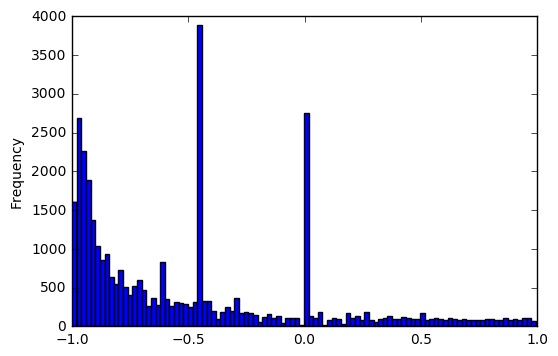

In [85]:
frankenFrame['compound'].plot.hist(stacked = True, bins = 100)

plt.show()

In [86]:
sortFrame = frankenFrame.sort_values(by = 'compound', ascending=[True])

In [50]:
sortFrame.reset_index(drop=True, inplace=True)

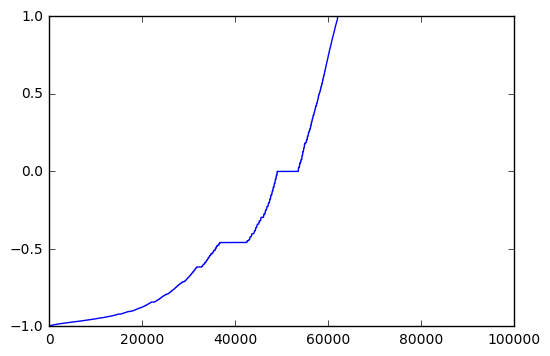

In [19]:
sortFrame['compound'].plot()
plt.axis([0, 100000, -1.0, 1.0])
plt.show()

In [51]:
checkManu = frankenFrame.groupby('model', as_index = False)['death'].mean()
manuCounts = frankenFrame['model'].value_counts()
remove = manuCounts[manuCounts <= 20].index
checkManu['model'].replace(remove, np.nan, inplace = True) 

In [87]:
frankenFrame.keys()

Index(['string', 'manufacturer', 'make', 'model', 'antilock', 'fire',
       'injured', 'death', 'compound'],
      dtype='object')

In [88]:
frankenFrame = frankenFrame.sort_values(by = 'compound', ascending=[True])

In [89]:
print(frankenFrame)

                                                                                                                                                                                                                                                                                                            string  \
34043                                                                                                                                                                                                                      WHILE DRIVING HEARD A LOUD RATTLING SOUND AND ENGINE DIED. PLEASE DESCRIBE DETAILS.  TT   
29055                                                                                                                                                                                                                                                                                                ROUGH IDLING.   
14197                                                                 

In [23]:
checkManu.reset_index(drop=True, inplace=True)
checkManu.dropna(how='any')

,model,death
2,(SEE MCGRAW EDISON),0.307692
10,02-034,0.000000
35,08L14-E09-100,0.000000
42,1 SERIES,0.000000
48,100,0.000000
59,1000GT,0.000000
74,10600,0.000000
101,1125CR,0.000000
102,1125R,0.000000
114,1200,0.000000


In [24]:
frankenFrame.keys()

Index(['string', 'manufacturer', 'make', 'model', 'antilock', 'fire',
       'injured', 'death', 'compound'],
      dtype='object')

In [57]:
checkManu = frankenFrame.groupby('model', as_index = False)['compound'].mean()
manuCounts = frankenFrame['model'].value_counts()
remove = manuCounts[manuCounts <= 20].index #if there are less than 20 items, drop them. 
checkManu['model'].replace(remove, np.nan, inplace = True) 

In [58]:
checkManu = checkManu.sort_values(by = 'compound', ascending=[True])

In [59]:
checkManu = checkManu.dropna(how='any')

In [60]:
print(checkManu)

                 model  compound
2403            COOPER -0.997200
1801               BMW -0.994000
2064        CARRI LITE -0.983700
3736               G10 -0.981650
2152        CHALLENGER -0.971700
5203               NPR -0.959900
871                528 -0.957500
4384             K3500 -0.952800
4465             KUMHO -0.952300
7185          ULTARA I -0.950900
4467          L SERIES -0.946600
4181               I30 -0.942800
4453            KODIAK -0.936000
897                540 -0.934900
5113              NAPA -0.920100
2637             DAMON -0.909700
1209               911 -0.904200
1668             AVION -0.902800
2221          CITATION -0.891800
2061           CARRERA -0.884000
6638            STYLUS -0.883533
3123            ESTEEM -0.872450
3911     GRAND CARAVAN -0.868900
4376               K20 -0.866386
2839             DUTCH -0.853100
1344        ADVENTURER -0.849250
1676             AXIOM -0.844200
7859             XR4TI -0.840480
5038                MT -0.831600
1745      

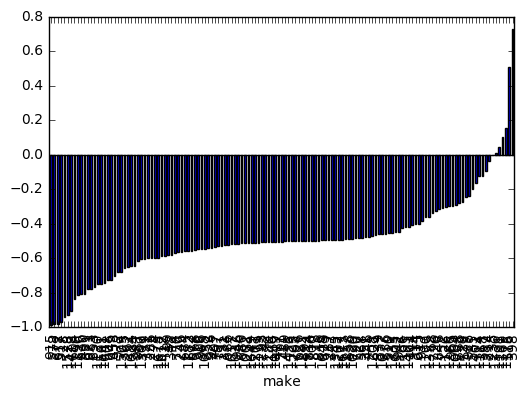

In [29]:
checkManu['compound'].plot.bar()
plt.axhline(0, color='k')
plt.xlabel('make')
plt.show()

In [30]:
print (frankenFrame[5])

KeyError: 5

In [31]:
import operator


In [32]:
sortVs = sorted(vs.items(), key=operator.itemgetter(0))

In [33]:
print(sortVs)

[('compound', -0.2263), ('neg', 0.079), ('neu', 0.921), ('pos', 0.0)]


In [34]:
carData['Ford Motor Company'].value_counts()

KeyError: 'Ford Motor Company'